Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:

- Vanilla logistic regression
- Ridge logistic regression
- Lasso logistic regression

If you're stuck on how to begin combining your two new modeling skills, here's a hint: the SKlearn LogisticRegression method has a "penalty" argument that takes either 'l1' or 'l2' as a value.

In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

In [85]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

In [102]:
# California crime data from 2017

df = pd.read_excel('california.xls', skiprows=4, index_col='State') #skipping first 4 rows of metadata
df.head()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
State,,,,,,,,,,,
Adelanto,33693.0,238.0,2.0,28.0,48.0,160.0,578.0,190.0,290.0,98.0,13.0
Agoura Hills,20814.0,16.0,0.0,2.0,4.0,10.0,278.0,71.0,187.0,20.0,4.0
Alameda,79761.0,253.0,0.0,16.0,133.0,104.0,2347.0,219.0,1725.0,403.0,25.0
Albany,19880.0,36.0,0.0,1.0,28.0,7.0,523.0,77.0,383.0,63.0,3.0
Alhambra,85865.0,172.0,4.0,17.0,89.0,62.0,1877.0,363.0,1244.0,270.0,12.0


In [103]:
df.columns

Index(['Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape1', 'Robbery',
       'Aggravated\nassault', 'Property\ncrime', 'Burglary', 'Larceny-\ntheft',
       'Motor\nvehicle\ntheft', 'Arson'],
      dtype='object')

In [104]:
df = df.rename(index=str, columns={'Violent\ncrime' : 'Violent_crime',
                                   'Murder and\nnonnegligent\nmanslaughter' : 'Murder',
                                   'Rape1': 'Rape', 
                                   'Aggravated\nassault': 'Assault', 
                                   'Property\ncrime': 'Property_crime',
                                   'Larceny-\ntheft': 'Larceny_theft',
                                   'Motor\nvehicle\ntheft': 'Motor_theft'})

df.index.rename('County', inplace=True)

In [105]:
df.shape

(464, 11)

In [106]:
df.isna().sum()

Population        3
Violent_crime     3
Murder            3
Rape              3
Robbery           3
Assault           3
Property_crime    4
Burglary          3
Larceny_theft     4
Motor_theft       3
Arson             3
dtype: int64

In [107]:
df.tail()

#for col in df.columns:
#    print(df[df[col].isnull()])
#    
#   # The last three lines are null for every column.

,Population,Violent_crime,Murder,Rape,Robbery,Assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson
County,,,,,,,,,,,
Yucaipa,53614.0,74.0,0.0,12.0,23.0,39.0,927.0,202.0,590.0,135.0,5.0
Yucca Valley,21806.0,65.0,0.0,9.0,18.0,38.0,444.0,148.0,244.0,52.0,2.0
1 The figures shown in this column for the offense of rape were reported using only the revised Uniform Crime Reporting definition of rape. See the data declaration for further explanation.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2 The FBI determined that the agency's data were overreported. Consequently, those data are not included in this table.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"3 Because of changes in the state/local agency's reporting practices, figures are not comparable to previous years' data.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df = df[:-3]  # removing last three rows with null values

In [109]:
print(df.tail(3))
df.isna().sum()

              Population  Violent_crime  Murder  Rape  Robbery  Assault  \
County                                                                    
Yuba City        67042.0          255.0     0.0  23.0     82.0    150.0   
Yucaipa          53614.0           74.0     0.0  12.0     23.0     39.0   
Yucca Valley     21806.0           65.0     0.0   9.0     18.0     38.0   

              Property_crime  Burglary  Larceny_theft  Motor_theft  Arson  
County                                                                     
Yuba City             2207.0     380.0         1448.0        379.0   15.0  
Yucaipa                927.0     202.0          590.0        135.0    5.0  
Yucca Valley           444.0     148.0          244.0         52.0    2.0  


Population        0
Violent_crime     0
Murder            0
Rape              0
Robbery           0
Assault           0
Property_crime    1
Burglary          0
Larceny_theft     1
Motor_theft       0
Arson             0
dtype: int64

In [110]:
df.describe()

# all quantitative values 

,Population,Violent_crime,Murder,Rape,Robbery,Assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson
count,4.610000e+02,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,460.000000,461.000000,461.000000
mean,7.124899e+04,321.605206,3.184382,27.073753,110.436009,180.911063,1862.060870,318.091106,1231.417391,311.314534,15.503254
std,2.150399e+05,1545.676597,14.851975,124.356076,559.698252,856.083620,5979.033721,924.754478,4055.402225,1101.892752,72.627927
min,1.130000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.221000e+04,33.000000,0.000000,3.000000,6.000000,19.000000,245.000000,55.000000,152.000000,26.000000,1.000000
50%,3.369300e+04,91.000000,1.000000,8.000000,23.000000,52.000000,697.000000,136.000000,477.000000,87.000000,4.000000
75%,7.632500e+04,234.000000,2.000000,20.000000,77.000000,131.000000,1817.500000,323.000000,1230.250000,273.000000,11.000000
max,4.007147e+06,30507.000000,281.000000,2455.000000,10814.000000,16957.000000,101618.000000,16668.000000,65757.000000,19193.000000,1414.000000


In [111]:
# A different take on the visualizations 

# Selecting top 5 most populated cities to compare 

df.sort_values('Population',ascending=False) # LA, SD, SJ, SF and Fresno  

df_top5 = df.sort_values('Population', ascending=False)[:5]

#df_top5.head()

crime_in_top5 = df_top5[['Violent_crime', 'Murder', 'Rape', 'Robbery', 'Assault',
        'Burglary', 'Motor_theft', 'Arson']]
crime_in_top5.head()

,Violent_crime,Murder,Rape,Robbery,Assault,Burglary,Motor_theft,Arson
County,,,,,,,,
Los Angeles,30507.0,281.0,2455.0,10814.0,16957.0,16668.0,19193.0,1414.0
San Diego,5221.0,35.0,559.0,1410.0,3217.0,3817.0,5135.0,158.0
San Jose,4188.0,32.0,571.0,1376.0,2209.0,3926.0,8068.0,173.0
San Francisco,6301.0,56.0,367.0,3220.0,2658.0,4935.0,4834.0,303.0
Fresno,2974.0,56.0,174.0,958.0,1786.0,3649.0,2789.0,217.0


In [112]:
# Most common crimes in Los Angeles

df_top5.loc['Los Angeles',: ].sort_values(ascending=False)

Population        4007147.0
Property_crime     101618.0
Larceny_theft       65757.0
Violent_crime       30507.0
Motor_theft         19193.0
Assault             16957.0
Burglary            16668.0
Robbery             10814.0
Rape                 2455.0
Arson                1414.0
Murder                281.0
Name: Los Angeles, dtype: float64

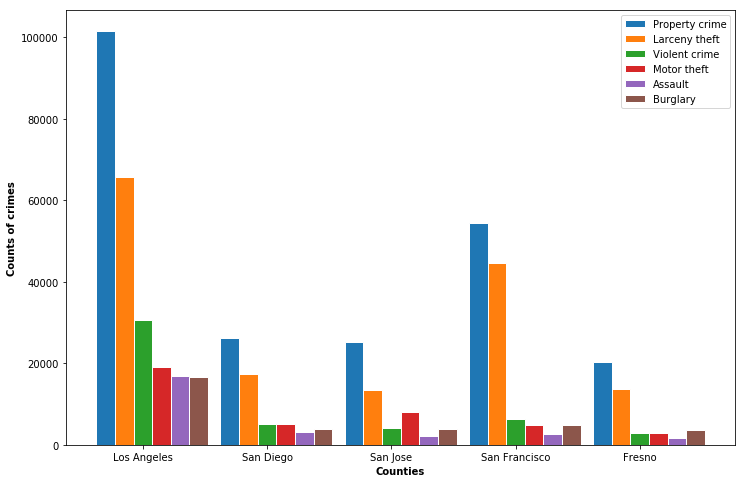

In [113]:
plt.figure(figsize=(12,8))
# set width of bar
barWidth = 0.15

# Set position of bar on X axis

# set height of bar
bars1 = df_top5.Property_crime
bars2 = df_top5.Larceny_theft
bars3 = df_top5.Violent_crime
bars4 = df_top5.Motor_theft
bars5 = df_top5.Assault
bars6 = df_top5.Burglary
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

# Make the plot
plt.bar(r1, bars1,  width=barWidth, edgecolor='white', label='Property crime')
plt.bar(r2, bars2,  width=barWidth, edgecolor='white', label='Larceny theft')
plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='Violent crime')
plt.bar(r4, bars4, width=barWidth, edgecolor='white', label='Motor theft')
plt.bar(r5, bars5, width=barWidth, edgecolor='white', label='Assault')
plt.bar(r6, bars6, width=barWidth, edgecolor='white', label='Burglary')
 
# Add xticks on the middle of the group bars
plt.xlabel('Counties', fontweight='bold')
plt.ylabel('Counts of crimes', fontweight='bold')
plt.xticks([r + barWidth*2 for r in range(len(bars1))], ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Fresno'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


# San Diego is quite safe given the second most populated cities. 

(0, 4500)

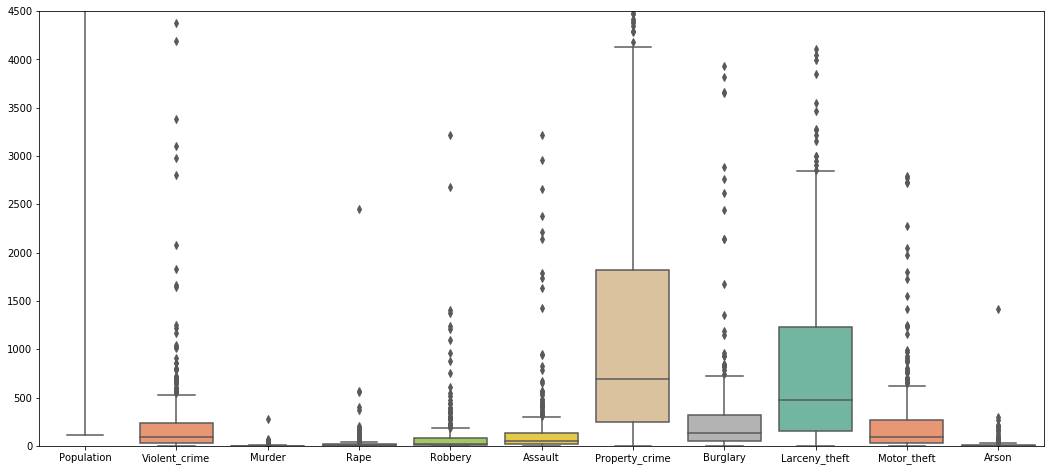

In [114]:
#Back to the main track 

plt.figure(figsize=(18,8))
sns.boxplot(data=df, palette='Set2')
# due to outliers in the 'Property_crime' and 'Larceny_theft' the visualization are not clear. 

plt.ylim(0,4500)
# We see that property crime is the most common type of crime, followed by larceny_theft. 
# Another visualization without these two common crime types. 



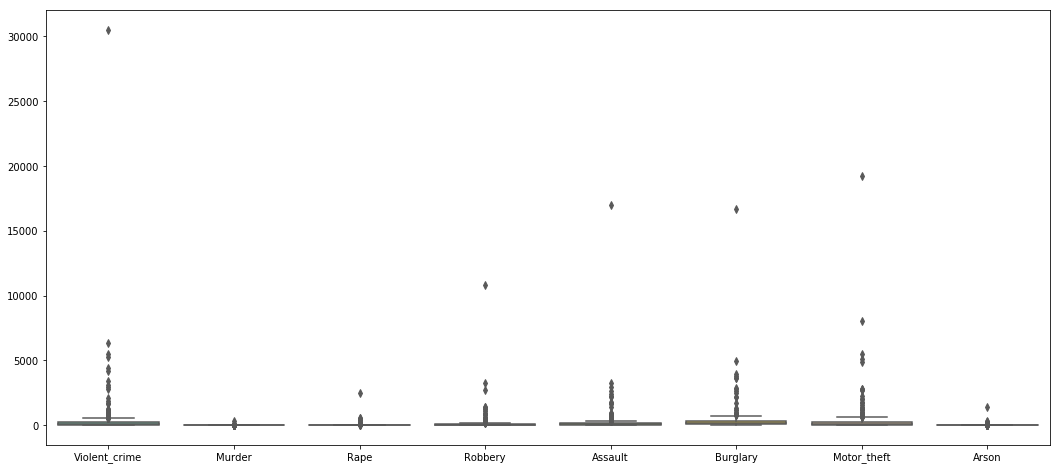

In [115]:
# Without 'Property_crime' and 'Larceny_theft'

plt.figure(figsize=(18,8))
sns.boxplot(data=df[['Violent_crime', 'Murder', 'Rape', 'Robbery', 'Assault',
        'Burglary', 'Motor_theft', 'Arson']], palette='Set2')
#plt.ylim(0,1000)
plt.show()

# Still there are a lot of outliers for each attribute. 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


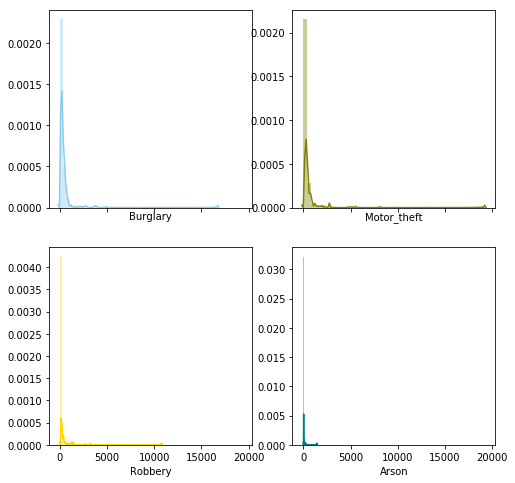

In [116]:
# plot
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.distplot( df["Burglary"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["Motor_theft"] , color="olive", ax=axes[0, 1])
sns.distplot( df["Robbery"] , color="gold", ax=axes[1, 0])
sns.distplot( df["Arson"] , color="teal", ax=axes[1, 1])


In [117]:
#for col in df.columns:
#    if df[col].name == 'Population':
#        print(df[col])

In [118]:
# Normalizing the outliers 

# Winsorizing the outliers. Outliers in the both ends are substituted with a quantile value given by the function 
# The (limits[0])th lowest values are set to the (limits[0])th percentile, and the (limits[1])th highest values are set to the (limits[1])th percentile. 

# Winsorizing all except population
import scipy
from scipy import stats

for col in df.columns:
    if df[col].name == 'Population':
        df[col] = df[col]
    else:
        df[col] = scipy.stats.mstats.winsorize(df[col], limits=[0,0.03])  # .97 quantile


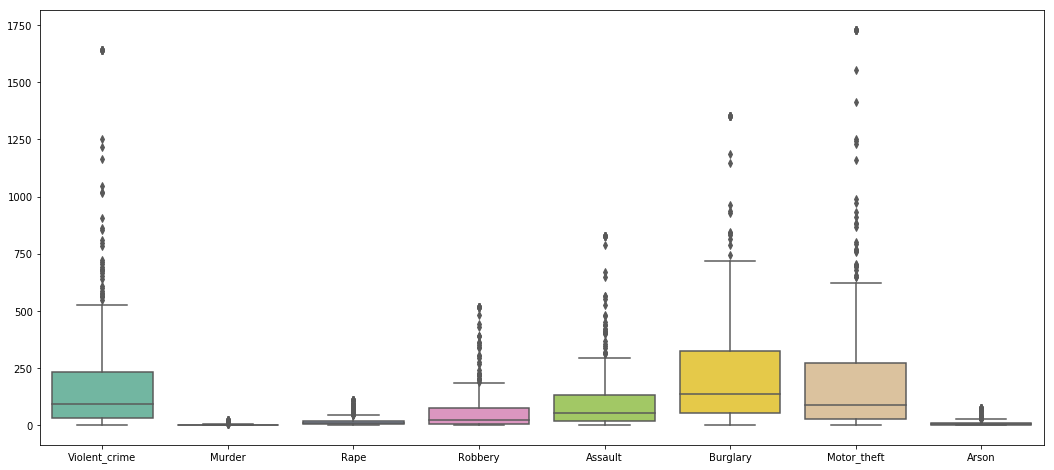

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


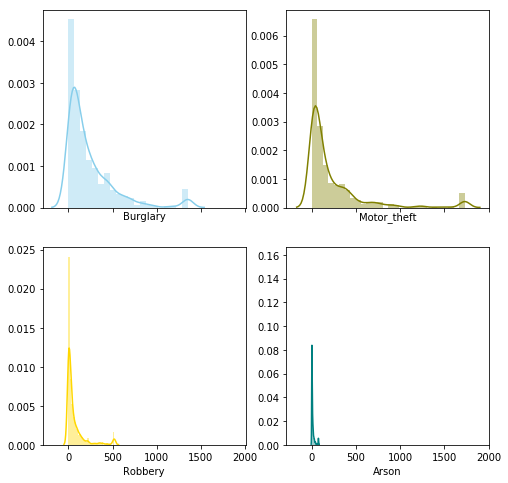

In [121]:
# Distributions look much better

plt.figure(figsize=(18,8))
sns.boxplot(data=df[['Violent_crime', 'Murder', 'Rape', 'Robbery', 'Assault',
        'Burglary', 'Motor_theft', 'Arson']], palette='Set2')
plt.show()

f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.distplot( df["Burglary"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["Motor_theft"] , color="olive", ax=axes[0, 1])
sns.distplot( df["Robbery"] , color="gold", ax=axes[1, 0])
sns.distplot( df["Arson"] , color="teal", ax=axes[1, 1])


In [20]:
# make comparative barplots - for loop that didn;t work

#def make_bar(df, col):
#
#    # set width of bar
#    barWidth = 0.25
#
#    # set height of bar
#    bar = df[col]
#     
#    # Set position of bar on X axis
#    #r = int(input("How many rows: "))
#    r = len(col)
#    rs = []
#    for r in np.arange(r):
#        row = [x + barWidth for x in r1]
#        rs.append(row)
#        


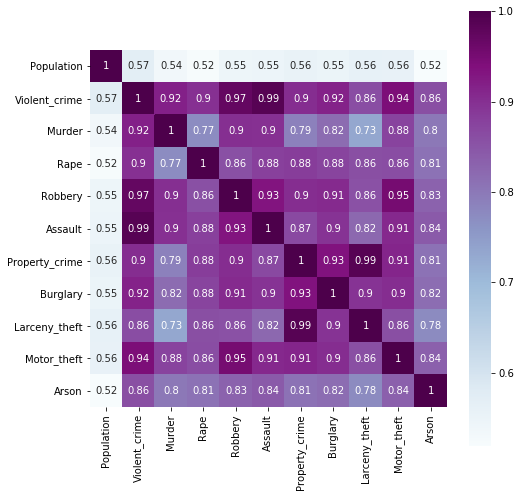

In [122]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='BuPu', annot=True, square=True)

Looking at the correlation plot, we see there is high multicollinearity in the data. For example, 'Violent_crime' is highly correlated (r > .95) with 'Robbery' and 'Assault'. 'Property_crime' is highly correlated with 'Larceny_theft'. Highly cprrelated variables must be removed from the model. But first, let's choose a response variable.

__Property crime as the response variable__

According to the FBI's Uniform Crime Reporting [(here)](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/property-crime/property-crime-topic-page/propertycrimemain_final), property crime includes the offenses of burglary, larceny-theft, motor vehicle theft, and arson. The object of the theft-type offenses is the taking of money or property, but there is no force or threat of force against the victims. The property crime category includes arson because the offense involves the destruction of property; however, arson victims may be subjected to force. Therefore, it is expected that the property crime will be highly correlated with these variables. 

Hence, we define that __Property crime__ as the following function:

$$ Property Crime = \alpha + Burglary + LarcenyTheft + MotorTheft + Arson $$

Multicollinearity with __Violent_crime__: 

- We need to remove multicollinear variables

- Create new features that are not highly multicollinear. 

But first, let's run a logistic regression model to see what it the default accuracy in the dataset. 

In [123]:
# Creating y

df.Property_crime.isna().sum()  # one null value
df['Property_crime'] = df['Property_crime'].fillna(df['Property_crime'].mean())

df.Property_crime.describe()

count     461.000000
mean     1388.422993
std      1777.012972
min         1.000000
25%       246.000000
50%       705.000000
75%      1819.000000
max      8465.000000
Name: Property_crime, dtype: float64

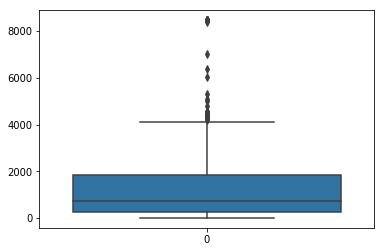

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


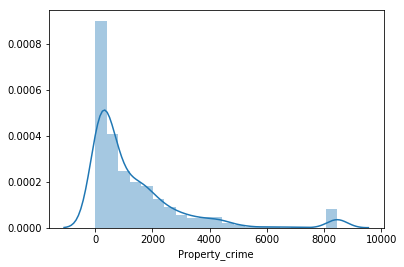

In [124]:
sns.boxplot(data=df.Property_crime)
plt.show()

sns.distplot(df.Property_crime)

In [135]:
df['y'] = np.where(df.Property_crime > df.Property_crime.median(), 1, 0)
df.y.value_counts() #0-300, 1-161 with mean, 231, 230 for median 

# This is a reasonable critoerion, however, - 

0    231
1    230
Name: y, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


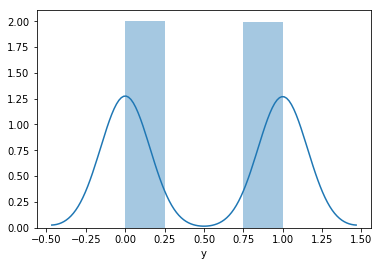

In [138]:
sns.distplot(df.y)

In [146]:
# Creating X and y
X = df.drop(['y', 'Property_crime'], axis=1)
y = df['y']


# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)
# random state here to set seed

## Logistic Regression 
LR = LogisticRegression(C=1e9, random_state=123)

# Fit the model.
fit = LR.fit(X_train, y_train)
#
# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)

# What are the coefficients? 
# Coefficients are the respective, constant values of each attribute. 
# The higher the number the bigger the impact on the formula/model. 
# Positive number means y increases with an increase of X, negative means y decreases (in Log Reg, the probability of y =1)
# with the increast of X.  

Coefficients
coefs: [[-1.35809625e-05  2.80967680e-03 -7.31148502e-04 -3.58404585e-03
   1.55355267e-02 -9.92707412e-03 -3.72536532e-03  2.76778773e-03
   3.95241157e-03 -4.97504528e-03]]
intercept:  [-0.00592815]


In [148]:
X_train.head()  # to check the features fed into the model 

,Population,Violent_crime,Murder,Rape,Robbery,Assault,Burglary,Larceny_theft,Motor_theft,Arson
County,,,,,,,,,,
National City,61574.0,296.0,3.0,23.0,109.0,161.0,132.0,667.0,358.0,11.0
Perris,77626.0,192.0,2.0,4.0,66.0,120.0,270.0,1104.0,503.0,7.0
Shafter,19284.0,43.0,0.0,7.0,11.0,25.0,117.0,242.0,114.0,11.0
Pomona,153066.0,853.0,18.0,88.0,344.0,403.0,718.0,2516.0,1250.0,26.0
Greenfield,17603.0,102.0,2.0,7.0,18.0,75.0,49.0,86.0,79.0,14.0


In [151]:
for x, coef in zip(X_train.columns, fit.coef_[0]):
    print(x, round(coef, 4))

Population -0.0
Violent_crime 0.0028
Murder -0.0007
Rape -0.0036
Robbery 0.0155
Assault -0.0099
Burglary -0.0037
Larceny_theft 0.0028
Motor_theft 0.004
Arson -0.005


In [152]:
#Predict
pred_y = LR.predict(X_test)

print(pd.crosstab(pred_y, y_test))
# why are crosstab values differ in row and columns as shown in the statsmodel? 

print('\nR² for the model with many features: \n', fit.coef_)
print('\nPercentage accuracy', fit.score(X_train, y_train))  #73%

score = cross_val_score(LR, X_train, y_train, cv=10)  # 75%
print("\nMean crossvalidated accuracy: ", round(score.mean(),2), 
      'with standard deviation', round(score.std(),3))
# put random_state here too. 

from sklearn.metrics import confusion_matrix
print('\nConfusion Matrix: \n', confusion_matrix(pred_y, y_test))

y       0   1
row_0        
0      24   2
1      47  66

R² for the model with many features: 
 [[-1.35809625e-05  2.80967680e-03 -7.31148502e-04 -3.58404585e-03
   1.55355267e-02 -9.92707412e-03 -3.72536532e-03  2.76778773e-03
   3.95241157e-03 -4.97504528e-03]]

Percentage accuracy 0.7329192546583851

Mean crossvalidated accuracy:  0.75 with standard deviation 0.06

Confusion Matrix: 
 [[24  2]
 [47 66]]


In [154]:
variance_inflation_factor?  # possible with R^2 in Linear Regression, not sure of Logistic Regression. 

In [155]:
# Calculate this again. 
#
## calculating Variance Inflation Factor for eliminative variables 
#
## $$ V.I.F. = 1 / (1 - R^2). $$
#
#print(X_train.columns)
#
#print('Intercept', fit.intercept_)
#R_sqr = fit.coef_[0]
#
#for n in R_sqr:
#    print('coef: ', n, "\nVIF", 1/(1-n),'\n')
#
## Looks like no VIF is too large but there is high multicollinearity! 
## Where is it going wrong? 
#

In [160]:
## Doesn't work! Return LinAlgError: singular Matrix

#Using Statsmodel for finding the feature importances 
#import statsmodels.api as sm 
#
#X_statsmod = df['Population']
#X_statsmod['intercept'] = 1
##X_statsmod = sm.add_constant(x, prepend=True)
#
#y = df['y']
#
## Declare the fit of the model 
#
#logit = sm.Logit(y, X_statsmod)
#result = logit.fit()
#
## Result summary
#print(result.summary())

In [161]:
# Chossing a smaller model on 
#PropertyCrime = α+Burglary+LarcenyTheft+MotorTheft+Arson

# Creating X and y

X = df[['Burglary', 'Larceny_theft', 'Motor_theft', 'Arson']]
y = df['y']


# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)


## Logistic Regression 
LR = LogisticRegression(C=1e9, random_state=1)

# Fit the model.
fit = LR.fit(X_train, y_train)
#
# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)


Coefficients
coefs: [[0.00968596 0.0183594  0.01723839 0.05136971]]
intercept:  [-12.09047174]


In [162]:
#Predict
pred_y = LR.predict(X_test)

print(pd.crosstab(pred_y, y_test))

print('\nPercentage accuracy', fit.score(X_train, y_train))  #99%

score = cross_val_score(LR, X_train, y_train, cv=10)  # 98%
print("\nMean crossvalidated accuracy: ", round(score.mean(),2), 
      'with standard deviation', round(score.std(),3))

from sklearn.metrics import confusion_matrix
print('\nConfusion Matrix: \n', confusion_matrix(pred_y, y_test))


# Accuracy increases? or overfitting?

y       0   1
row_0        
0      68   1
1       1  83

Percentage accuracy 0.9967532467532467

Mean crossvalidated accuracy:  0.99 with standard deviation 0.016

Confusion Matrix: 
 [[68  1]
 [ 1 83]]


### Feature Engineering 



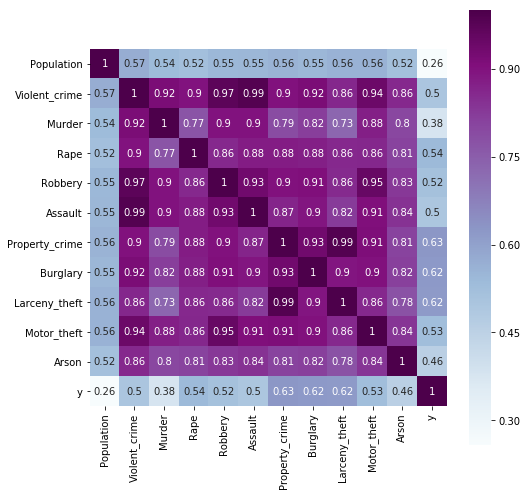

In [163]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='BuPu', annot=True, square=True)

In [164]:
# Creating new version on the dataset
df_new = df
#df_new.head()

In [165]:
df_new.head()

,Population,Violent_crime,Murder,Rape,Robbery,Assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson,y
County,,,,,,,,,,,,
Adelanto,33693.0,238.0,2.0,28.0,48.0,160.0,578.0,190.0,290.0,98.0,13.0,0
Agoura Hills,20814.0,16.0,0.0,2.0,4.0,10.0,278.0,71.0,187.0,20.0,4.0,0
Alameda,79761.0,253.0,0.0,16.0,133.0,104.0,2347.0,219.0,1725.0,403.0,25.0,1
Albany,19880.0,36.0,0.0,1.0,28.0,7.0,523.0,77.0,383.0,63.0,3.0,0
Alhambra,85865.0,172.0,4.0,17.0,89.0,62.0,1877.0,363.0,1244.0,270.0,12.0,1


In [167]:
df_new = df_new.drop('Property_crime', axis=1)

In [35]:
# New features 1: population percentage
#
#def perc_val(df, col):
#    for col in df.columns:
#        new_val = [col/pop *100 for col,pop in zip(df[col], df.Population)]
#    return new_val
#
#
#df_new['Violent_crime_perc'] = perc_val(df_new, 'Violent_crime')
#df_new['Murder_perc'] = perc_val(df_new, 'Murder')
#df_new['Rape_perc'] = perc_val(df_new, 'Rape')
#df_new['Robbery_perc'] = perc_val(df_new, 'Robbery')
#df_new['Burglary_perc'] = perc_val(df_new, 'Burglary')
#df_new['Larceny_theft_perc']= perc_val(df_new, 'Larceny_theft')
#df_new['Motor_theft_perc'] = perc_val(df_new, 'Motor_theft')
#df_new['Arson_perc'] = perc_val(df_new, 'Arson')

In [169]:
# Feature 1: Creating a variable for the highly correlated variables Violent_crime with Robbery and Assault

# New feature: rob_assault_crime = violent_crime + Robbery + Assault   
df_new['rob_assault_crime'] = df_new.Violent_crime + df_new.Robbery + df_new.Assault


# drop Violent_crime, Robbery and Assault
df_new = df_new.drop(['Violent_crime', 'Robbery', 'Assault'], axis=1)

#df_new['prop_crime_larceny'] = df_new.Property_crime + df_new.Larceny_theft
# drop Property_crime and Larceny_theft

In [170]:
df_new.head(3)

#Burglary+LarcenyTheft+MotorTheft+Arson

,Population,Murder,Rape,Burglary,Larceny_theft,Motor_theft,Arson,y,rob_assault_crime
County,,,,,,,,,
Adelanto,33693.0,2.0,28.0,190.0,290.0,98.0,13.0,0,446.0
Agoura Hills,20814.0,0.0,2.0,71.0,187.0,20.0,4.0,0,30.0
Alameda,79761.0,0.0,16.0,219.0,1725.0,403.0,25.0,1,490.0


In [38]:
#df_new = df_new.drop(['Violent_crime', 'Robbery', 'Assault', 'Property_crime', 'Larceny_theft'], axis=1)

#df_new = df_new.drop('prop_crime_larceny', axis=1)

In [171]:
df_new.describe()

,Population,Murder,Rape,Burglary,Larceny_theft,Motor_theft,Arson,y,rob_assault_crime
count,4.610000e+02,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,7.124899e+04,2.108460,17.928416,240.503254,922.639913,225.945770,9.752711,0.498915,389.718004
std,2.150399e+05,4.296251,24.919289,285.081214,1210.121676,356.009488,15.861754,0.500542,602.883725
min,1.130000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.221000e+04,0.000000,3.000000,55.000000,152.000000,26.000000,1.000000,0.000000,61.000000
50%,3.369300e+04,1.000000,8.000000,136.000000,482.000000,87.000000,4.000000,0.000000,175.000000
75%,7.632500e+04,2.000000,20.000000,323.000000,1231.000000,273.000000,11.000000,1.000000,442.000000
max,4.007147e+06,21.000000,110.000000,1351.000000,5865.000000,1730.000000,75.000000,1.000000,2985.000000


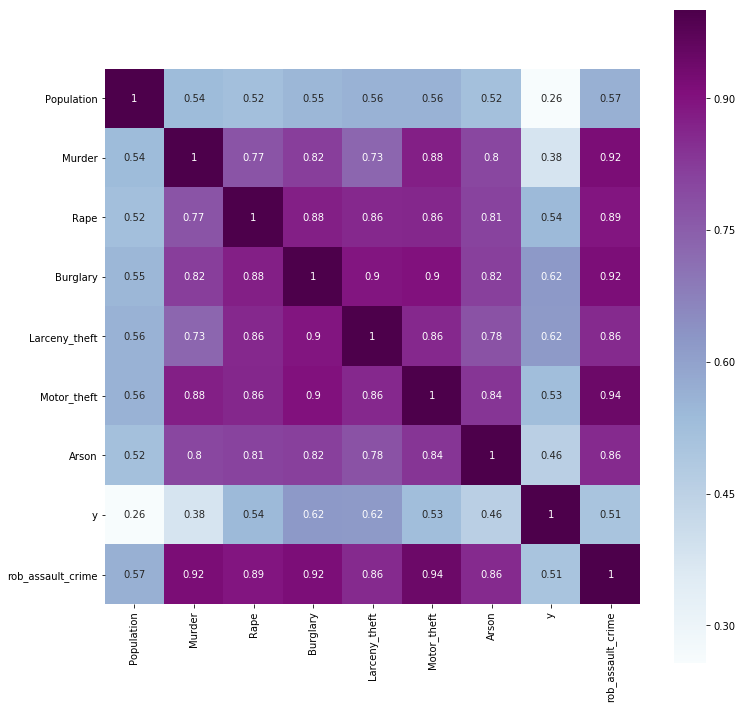

In [172]:
plt.figure(figsize=(12,12))
sns.heatmap(df_new.corr(), cmap='BuPu', annot=True, square=True)

# Great, no correlation above 0.95. 

In [173]:
df_new.columns

Index(['Population', 'Murder', 'Rape', 'Burglary', 'Larceny_theft',
       'Motor_theft', 'Arson', 'y', 'rob_assault_crime'],
      dtype='object')

In [174]:
# Creating new features: population percentage

def perc_val(df, col):
    for col in df.columns:
        new_val = [col/pop *100 for col,pop in zip(df[col], df.Population)]
    return new_val


df_new['Murder_perc'] = perc_val(df_new, 'Murder')
df_new['Rape_perc'] = perc_val(df_new, 'Rape')
df_new['Burglary_perc'] = perc_val(df_new, 'Burglary')
df_new['Larceny_theft_perc']= perc_val(df_new, 'Larceny_theft')
df_new['Motor_theft_perc'] = perc_val(df_new, 'Motor_theft')
df_new['Arson_perc'] = perc_val(df_new, 'Arson')

In [175]:
df_new.head()  #15 columns now.

,Population,Murder,Rape,Burglary,Larceny_theft,Motor_theft,Arson,y,rob_assault_crime,Murder_perc,Rape_perc,Burglary_perc,Larceny_theft_perc,Motor_theft_perc,Arson_perc
County,,,,,,,,,,,,,,,
Adelanto,33693.0,2.0,28.0,190.0,290.0,98.0,13.0,0,446.0,1.323717,0.003929,1.166046e-05,3.460797e-08,1.027156e-10,3.048574e-13
Agoura Hills,20814.0,0.0,2.0,71.0,187.0,20.0,4.0,0,30.0,0.144134,0.000692,3.327014e-06,1.598450e-08,7.679687e-11,3.689674e-13
Alameda,79761.0,0.0,16.0,219.0,1725.0,403.0,25.0,1,490.0,0.614335,0.000770,9.656601e-07,1.210692e-09,1.517900e-12,1.903060e-15
Albany,19880.0,0.0,1.0,77.0,383.0,63.0,3.0,0,71.0,0.357143,0.001796,9.036686e-06,4.545617e-08,2.286528e-10,1.150165e-12
Alhambra,85865.0,4.0,17.0,363.0,1244.0,270.0,12.0,1,323.0,0.376172,0.000438,5.102159e-07,5.942071e-10,6.920248e-13,8.059451e-16


In [176]:
df_new.columns

Index(['Population', 'Murder', 'Rape', 'Burglary', 'Larceny_theft',
       'Motor_theft', 'Arson', 'y', 'rob_assault_crime', 'Murder_perc',
       'Rape_perc', 'Burglary_perc', 'Larceny_theft_perc', 'Motor_theft_perc',
       'Arson_perc'],
      dtype='object')

## Vanilla Logistic Regression 



In [180]:
X_train.columns

Index(['Population', 'Murder', 'Rape', 'Burglary', 'Larceny_theft',
       'Motor_theft', 'Arson', 'rob_assault_crime', 'Murder_perc', 'Rape_perc',
       'Burglary_perc', 'Larceny_theft_perc', 'Motor_theft_perc',
       'Arson_perc'],
      dtype='object')

In [181]:
# Creating X and y with 17 variables

df_X = df_new.drop('y', axis=1)
y = df_new['y']


# Train test split 

X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=.3)

# print(X_train.columns)
#['Population', 'Murder', 'Rape', 'Burglary', 'Larceny_theft','Motor_theft', 'Arson', 'rob_assault_crime', 'Murder_perc', 'Rape_perc',
#       'Burglary_perc', 'Larceny_theft_perc', 'Motor_theft_perc', 'Arson_perc']

## Logistic Regression 
LR = LogisticRegression(C=1e9, random_state=1)

# Fit the model.
fit = LR.fit(X_train, y_train)
#
# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)

#Predict
pred_y = LR.predict(X_test)

print('\nPercentage accuracy', fit.score(X_train, y_train))  #63%

score = cross_val_score(LR, X_train, y_train, cv=10)  # 74%
print("\nMean crossvalidated accuracy: ", round(score.mean(),2), 
      'with standard deviation', round(score.std(),3))
#
print(pd.crosstab(pred_y, y_test))
#from sklearn.metrics import confusion_matrix
#print('\nConfusion Matrix: \n', confusion_matrix(pred_y, y_test))

Coefficients
coefs: [[-1.32152858e-05 -5.12568395e-05 -1.50646076e-03 -4.13329406e-03
   2.75756067e-03  7.11098858e-03 -6.99126343e-04 -8.80937626e-04
  -9.96635623e-04 -4.67778664e-04 -4.29714764e-04 -3.93152057e-04
  -3.54750983e-04 -3.17394064e-04]]
intercept:  [-0.0009936]

Percentage accuracy 0.6273291925465838

Mean crossvalidated accuracy:  0.69 with standard deviation 0.102
y       0   1
row_0        
0      23   3
1      46  67


- Biggest model with all original and engineered features

    - Percentage accuracy 0.62

    - Mean crossvalidated accuracy:  0.69 with  standard deviation 0.093

### Vanilla Regression with only engineered features 

In [182]:
df_new.columns

Index(['Population', 'Murder', 'Rape', 'Burglary', 'Larceny_theft',
       'Motor_theft', 'Arson', 'y', 'rob_assault_crime', 'Murder_perc',
       'Rape_perc', 'Burglary_perc', 'Larceny_theft_perc', 'Motor_theft_perc',
       'Arson_perc'],
      dtype='object')

In [183]:
# Selecting a smaller model with only engineered features - accuracy improved 

df_X = df_new[['rob_assault_crime', 'Murder_perc','Rape_perc', 'Burglary_perc', 'Larceny_theft_perc', 
               'Motor_theft_perc', 'Arson_perc']]
y = df_new['y']

In [184]:
# Train test split 

X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=.3)

In [185]:

## Logistic Regression 
LR = LogisticRegression(C=1e9, random_state=111)

# Fit the model.
fit = LR.fit(X_train, y_train)
#
# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)

Coefficients
coefs: [[ 0.02226842 -2.90201672 -0.05747172 -0.01428157 -0.01007815 -0.00850023
  -0.00743262]]
intercept:  [-2.61061174]


In [186]:
#Predict
pred_y = LR.predict(X_test)

print('\nPercentage accuracy', fit.score(X_train, y_train))  #63%

score = cross_val_score(LR, X_train, y_train, cv=10)  # 74%
print("\nMean crossvalidated accuracy: ", round(score.mean(),2), 
      'with standard deviation', round(score.std(),3))

from sklearn.metrics import confusion_matrix
print('\nConfusion Matrix: \n', confusion_matrix(pred_y, y_test))


Percentage accuracy 0.906832298136646

Mean crossvalidated accuracy:  0.91 with standard deviation 0.057

Confusion Matrix: 
 [[64 14]
 [ 6 55]]


- Increased accuracy with engineered features

    - Percentage accuracy 0.90

    - Mean crossvalidated accuracy:  0.91 with  standard deviation 0.054

### Vanilla Regression with features in the formula 

In [187]:
# Logistic Regression - Smaller model - better accuracy!

# Burglary+LarcenyTheft+MotorTheft+Arson

# drop Violent_crime, Robbery and Assault

df_X = df_new[['Burglary', 'Larceny_theft', 'Motor_theft', 'Arson','rob_assault_crime']]
y = df_new['y']


# Train test split 
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=.3)


## Logistic Regression 
LR = LogisticRegression(C=1e9, random_state=111)

# Fit the model.
fit = LR.fit(X_train, y_train)
#
# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)

#Predict
pred_y = LR.predict(X_test)

print('\nPercentage accuracy', fit.score(X_train, y_train))  #99%

score = cross_val_score(LR, X_train, y_train, cv=10)  # 98%
print("\nMean crossvalidated accuracy: ", round(score.mean(),2), 
      'with standard deviation', round(score.std(),3))

from sklearn.metrics import confusion_matrix
print('\nConfusion Matrix: \n', confusion_matrix(pred_y, y_test))

Coefficients
coefs: [[ 0.01023575  0.01119306  0.00523764 -0.01762215 -0.00050925]]
intercept:  [-7.00655595]

Percentage accuracy 0.9968944099378882

Mean crossvalidated accuracy:  0.99 with standard deviation 0.015

Confusion Matrix: 
 [[77  2]
 [ 0 60]]


- Drastic increase in accuracy: 

    - Percentage accuracy 0.98

    - Mean crossvalidated accuracy:  0.98 with  standard deviation 0.025



## Performing PCA

In [190]:
df_new.columns

Index(['Population', 'Murder', 'Rape', 'Burglary', 'Larceny_theft',
       'Motor_theft', 'Arson', 'y', 'rob_assault_crime', 'Murder_perc',
       'Rape_perc', 'Burglary_perc', 'Larceny_theft_perc', 'Motor_theft_perc',
       'Arson_perc'],
      dtype='object')

In [195]:
# Performing PCA 

df_X = df_new.drop('y', axis=1)
y = df_new['y']


In [196]:
from sklearn.decomposition import PCA  # important components 

pca = PCA(n_components=5)
pca.fit(df_X)
X_pca = pca.transform(df_X)

In [197]:
# Perforning vanilla Logistic Regression on reduced X

# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3)


## Logistic Regression 
LR = LogisticRegression(C=1e9, random_state=1)

# Fit the model.
fit = LR.fit(X_train, y_train)
#
# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)

#Predict
pred_y = LR.predict(X_test)
print('\nPercentage accuracy', fit.score(X_train, y_train))  

score = cross_val_score(LR, X_train, y_train, cv=10)  
print("\nMean crossvalidated accuracy: ", round(score.mean(),2), 
      'with standard deviation', round(score.std(),3))
#
print(pd.crosstab(pred_y, y_test))
#from sklearn.metrics import confusion_matrix
#print('\nConfusion Matrix: \n', confusion_matrix(pred_y, y_test))

Coefficients
coefs: [[ 9.32153489e-06 -3.97777710e-03  1.36373936e-03  3.54635225e-03
   5.65085683e-03]]
intercept:  [0.00070329]

Percentage accuracy 0.8540372670807453

Mean crossvalidated accuracy:  0.84 with standard deviation 0.052
y       0   1
row_0        
0      70  23
1       0  46


__with 5 most important components_
 - Accuracy: 85%
 - Crossvalidated accuracy 84% with 0.052 standard deviation

## Ridge Regression - L2 regularization
## Lasso Regression - L1 regularization 

### Why regularization? 

- Remember the bias-variance tradeoff? Regularization directly affect this. A standard least squares model tends to have some variance in it, i.e. this model won’t generalize well for a data set different than its training data. Regularization, significantly reduces the variance of the model, without substantial increase in its bias. The tuning parameter, λ, is beneficial as it is it reduces the variance (hence avoiding overfitting), without loosing any important properties in the data. But after certain value, the model starts loosing important properties, giving rise to bias in the model and thus underfitting. Therefore, the value of λ should be carefully selected.

- Ridge and Lasso are considered shrinkage models which essentially shrinks the uninformative coefficient estimates in the model to achieve optimized efficiency in the model. This is another way of avoiding overfitting (another option: cross-validation). By shrinking/regularizing the coefficient estimates, it increases model interpretability, i.e., discourages learning a complex model and avoids overfitting. 

- In these models, the OLS cost function has an added component, i.e., the __penalty__. 

$$\sum_{i=1}^n(y_i-(\alpha+\beta x_i))^2+\lambda\sum_{j=1}^p\beta_j^2 $$

- What does this mean? 
    - The OLS functions estimates the RSS and in a perfectly fit model the RSS should be zero (that is, there is no difference between the y and the predicted y). In the Ridge Regression cost function, we add a penalty component to the OLS cost function. When the penalty component is added to the function, what it does is to add shrinkage amount to the coefficient estimates. The overall value of the function needs to be small, hence the slope-values (coefficients) needs to be small. 
    
    - The $\lambda$ is the tuning parameter that decides on the penalty we want to assign to the model. 
        - When the $\lambda$ is zero, the penalty has no effect and OLS RSS = Ridge Regression RSS
        - When the $\lambda$ is $\infty$, the coefficients has to be very small. 
        - Thus, $\lambda$ is important, and is generally decided on by cross-validation. In Ridge regression, $\lambda$ is called the 'l2' norm. 

- How are __Ridge__ and __Lasso__ different? 
    - __Ridge:__ $$\sum_{i=1}^n(y_i-(\alpha+\beta x_i))^2+\lambda\sum_{j=1}^p\beta_j^2 $$
    
    - __Lasso:__ $$\sum_{i=1}^n(y_i-(\alpha+\beta x_i))^2+\lambda\sum_{j=1}^p|\beta_j| $$
    
    - Lasso penalized only the high coefficients
    
According to this [article](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a) the advantages of Lasso over the Ridge is : __model interpretability__: Ridge will shrink the coefficients for least important predictors, very close to zero. But it will never make them exactly zero. In other words, the final model will include all predictors. However, in the case of the lasso, the L1 penalty has the eﬀect of forcing some of the coeﬃcient estimates to be exactly equal to zero when the tuning parameter λ is suﬃciently large. Therefore, the lasso method also performs variable selection and is said to yield sparse models.

In [198]:
df_new.columns

Index(['Population', 'Murder', 'Rape', 'Burglary', 'Larceny_theft',
       'Motor_theft', 'Arson', 'y', 'rob_assault_crime', 'Murder_perc',
       'Rape_perc', 'Burglary_perc', 'Larceny_theft_perc', 'Motor_theft_perc',
       'Arson_perc'],
      dtype='object')

In [260]:
# X with all features 

X_big = df_new.drop('y', axis=1)

# X with engineered features 
X_newftrs = df_new[['rob_assault_crime', 'Murder_perc', 'Rape_perc', 'Burglary_perc', 
                    'Larceny_theft_perc', 'Motor_theft_perc', 'Arson_perc']]

# X with only features in the function 
#X_small = df_new[['Burglary', 'Larceny_theft', 'Motor_theft', 'Arson','rob_assault_crime']]

# y
y = df_new['y']

In [261]:
from sklearn.metrics import accuracy_score

In [262]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X_big, y, test_size=.3)

# Generate range of lambda values to pick one resulting in best r squared
lamds = np.arange(0.001, 100, 2)
lr_ridge = LogisticRegression(penalty='l2')
ridge_scores = []
accuracies = []

# Train model with different regularization or lambda values
for l in lamds:
    lr_ridge.set_params(C=l, fit_intercept=False)
    lr_ridge.fit(X_train, y_train)
    y_pred = lr_ridge.predict(X_test)
    ridge_scores.append(lr_ridge.score(X_train, y_train))
    accuracies.append(accuracy_score(y_test, y_pred))

# Get values
#print('Training accuracy scores: ', ridge_scores)
#print('Testing accuracy scores: ', accuracies)

## Printing training and testing accuracy side by side 
#for tr, ts in zip(ridge_scores, accuracies):
#    print('Training: ', tr, "Testing: ", ts, '\n')

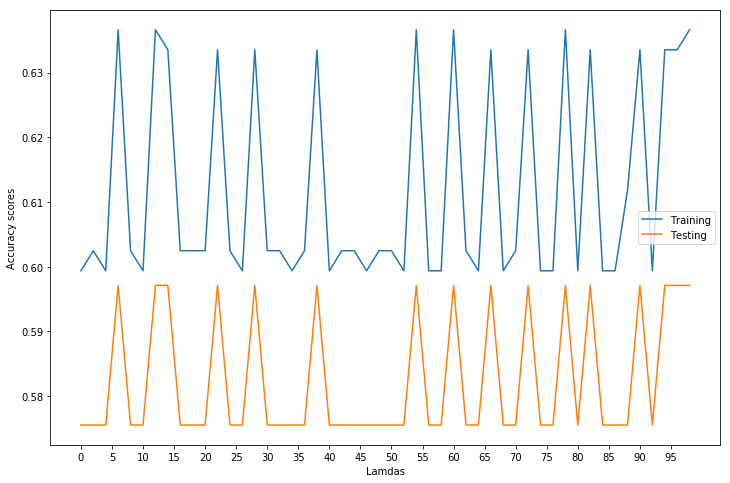

In [263]:
plt.figure(figsize=(12, 8))
plt.plot(lamds, ridge_scores)
plt.xlabel('Lamdas')
plt.xticks(np.arange(0.001, 100, 5))
plt.ylabel('Accuracy scores')

plt.plot(lamds, accuracies )
plt.legend(['Training', 'Testing'])


In [264]:
# Select best lambda for regularization

# Instantiate and set regularization coefficient 
lr_ridge = LogisticRegression(penalty='l2', C=17, fit_intercept=False) #smaller values of C = stronger regularization

# Fit model
lr_ridge.fit(X_train, y_train)

# Get results
print('Coefficient')
print(lr_ridge.coef_)
print(lr_ridge.intercept_)

# Get predictions
pred_y_r = lr_ridge.predict(X_test)

print(pd.crosstab(pred_y_r, y_test))

ridge_score = cross_val_score(lr_ridge, X_train, y_train, cv=10)
print('Mean CV accuracy:', ridge_score.mean())

Coefficient
[[-2.84186051e-06 -2.33689267e-04 -2.77986015e-03 -2.72400377e-03
   2.21580913e-03  6.14012367e-03 -2.39828151e-03 -1.82086955e-03
  -4.35579135e-03 -1.94386507e-03 -1.80554892e-03 -1.66408540e-03
  -1.50750925e-03 -1.35164840e-03]]
0.0
y       0   1
row_0        
0      14   1
1      58  66
Mean CV accuracy: 0.5780577956989247


In [265]:
## Ridge with the new features 

# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X_newftrs, y, test_size=.3)

# Generate range of lambda values to pick one resulting in best r squared
lamds = np.arange(0.001, 100, 2)
lr_ridge = LogisticRegression(penalty='l2')
ridge_scores = []
accuracies = []

# Train model with different regularization or lambda values
for l in lamds:
    lr_ridge.set_params(C=l, fit_intercept=False)
    lr_ridge.fit(X_train, y_train)
    y_pred = lr_ridge.predict(X_test)
    ridge_scores.append(lr_ridge.score(X_train, y_train))
    accuracies.append(accuracy_score(y_test, y_pred))

# Get values
#print('Training accuracy scores: ', ridge_scores)
#print('Testing accuracy scores: ', accuracies)

## Print training and testing accuracies side by side 
#for tr, ts in zip(ridge_scores, accuracies):
#    print('Training: ', tr, "Testing: ", ts, '\n')

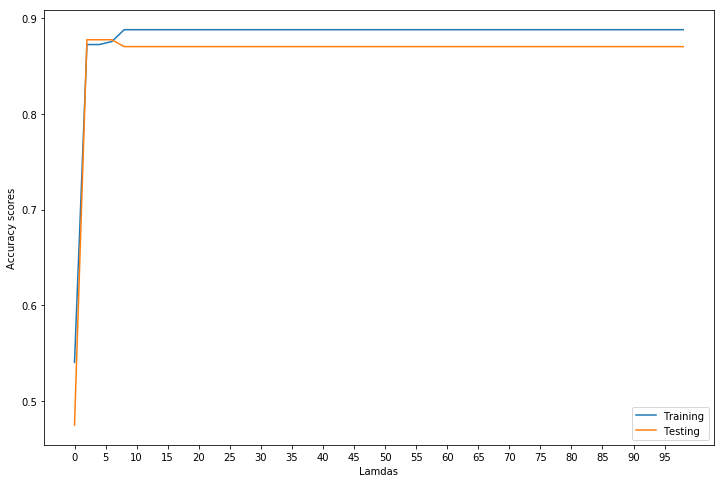

In [266]:
plt.figure(figsize=(12, 8))
plt.plot(lamds, ridge_scores)
plt.xlabel('Lamdas')
plt.xticks(np.arange(0.001, 100, 5))
plt.ylabel('Accuracy scores')

plt.plot(lamds, accuracies )
plt.legend(['Training', 'Testing'])


In [267]:
# Select best lambda for regularization

# Instantiate and set regularization coefficient 
lr_ridge = LogisticRegression(penalty='l2', C=10, fit_intercept=False) #smaller values of C = stronger regularization

# Fit model
lr_ridge.fit(X_train, y_train)

# Get results
print('Coefficient')
print(lr_ridge.coef_)
print(lr_ridge.intercept_)

# Get predictions
pred_y_r = lr_ridge.predict(X_test)

print(pd.crosstab(pred_y_r, y_test))

ridge_score = cross_val_score(lr_ridge, X_train, y_train, cv=10)
print('Mean CV accuracy:', ridge_score.mean())

Coefficient
[[ 0.01604377 -4.49555159 -0.10998316 -0.01569236 -0.00904678 -0.00753202
  -0.00661002]]
0.0
y       0   1
row_0        
0      63   6
1      12  58
Mean CV accuracy: 0.8853372434017596


### Findings: 

- With the biggest model the accuracy 61%. Accuracy increases to 88% with the engineered features. 

## Lasso Regression - L1 Regularization

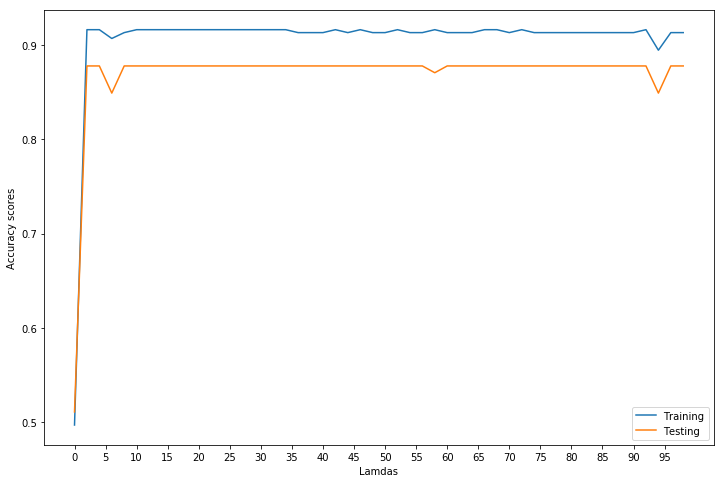

In [268]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X_big, y, test_size=.3)

# Generate range of lambda values to pick one resulting in best r squared
lamds = np.arange(0.001, 100, 2)
lr_lasso = LogisticRegression(penalty='l1')
lasso_scores = []
accuracies = []

# Train model with different regularization or lambda values
for l in lamds:
    lr_lasso.set_params(C=l, fit_intercept=False)
    lr_lasso.fit(X_train, y_train)
    y_pred_l = lr_lasso.predict(X_test)
    lasso_scores.append(lr_lasso.score(X_train, y_train))
    accuracies.append(accuracy_score(y_test, y_pred_l))

# Get values
#print('Training accuracy scores: ', ridge_scores)
#print('Testing accuracy scores: ', accuracies)

## Printing training and testing accuracy side by side 
#for tr, ts in zip(ridge_scores, accuracies):
#    print('Training: ', tr, "Testing: ", ts, '\n')

plt.figure(figsize=(12, 8))
plt.plot(lamds, lasso_scores)
plt.xlabel('Lamdas')
plt.xticks(np.arange(0.001, 100, 5))
plt.ylabel('Accuracy scores')

plt.plot(lamds, accuracies )
plt.legend(['Training', 'Testing'])




In [269]:
# Select best lambda for regularization

# Instantiate and set regularization coefficient 
lr_lasso = LogisticRegression(penalty='l1', C=10, fit_intercept=False) #smaller values of C = stronger regularization

# Fit model
lr_lasso.fit(X_train, y_train)

# Get results
print('Coefficient')
print(lr_lasso.coef_)
print(lr_lasso.intercept_)

# Get predictions
pred_y_l = lr_lasso.predict(X_test)

print(pd.crosstab(pred_y_l, y_test))

lasso_score = cross_val_score(lr_lasso, X_train, y_train, cv=10)
print('Mean CV accuracy:', lasso_score.mean())

Coefficient
[[-1.90411386e-05 -5.15696018e-01 -1.08003139e-01 -6.39614627e-03
   4.22854051e-03  7.67544778e-03  1.58897216e-02  2.37743126e-02
  -6.59957854e+00  1.13273106e+01  6.49065396e+00  0.00000000e+00
  -3.07563205e+00 -1.24721409e+01]]
0.0
y       0   1
row_0        
0      57   6
1      11  65
Mean CV accuracy: 0.8974187438905181


In [270]:
# X with all features 

X_big = df_new.drop('y', axis=1)

# X with engineered features 
X_newftrs = df_new[['rob_assault_crime', 'Murder_perc', 'Rape_perc', 'Burglary_perc', 
                    'Larceny_theft_perc', 'Motor_theft_perc', 'Arson_perc']]

# X with only features in the function 
#X_small = df_new[['Burglary', 'Larceny_theft', 'Motor_theft', 'Arson','rob_assault_crime']]

# y
y = df_new['y']

In [271]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_big, y, test_size=.3)

In [272]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_newftrs, y, test_size=.3)

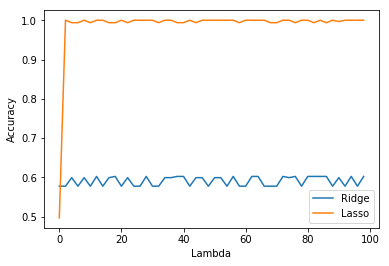

In [274]:
## Comparing Ridge and Lasso for the big model 

# Store estimates.
estimates = [None,None,None]

# Storing legend information.
labels = []

#Run the model for many alphas.
for l in lamds:
    ridgeregrBig = LogisticRegression(penalty='l2', C=l)
    ridgeregrBig.fit(X_train_b, y_train_b)
    
    lassBig = LogisticRegression(penalty='l1', C=l)
    lassBig.fit(X_train_b, y_train_b)
    
    estimates = np.row_stack((
        estimates,
        [ridgeregrBig.score(X_train_b, y_train_b),lassBig.score(X_train_b, y_train_b),l]))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=['Ridge','Lasso','lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Plot a line for each parameter.
for var in ['Ridge','Lasso']:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend(labels)
plt.show()

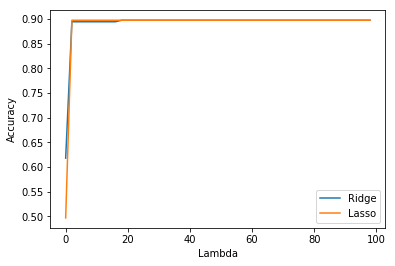

In [275]:
## Comparing Ridge and Lasso for the SMALL model 

# Store estimates.
estimates = [None,None,None]

# Storing legend information.
labels = []

#Run the model for many alphas.
for l in lamds:
    ridgeregrBig = LogisticRegression(penalty='l2', C=l)
    ridgeregrBig.fit(X_train_s, y_train_s)
    
    lassBig = LogisticRegression(penalty='l1', C=l)
    lassBig.fit(X_train_s, y_train_s)
    
    estimates = np.row_stack((
        estimates,
        [ridgeregrBig.score(X_train_s, y_train_s),lassBig.score(X_train_s, y_train_s),l]))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=['Ridge','Lasso','lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Plot a line for each parameter.
for var in ['Ridge','Lasso']:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend(labels)
plt.show()